# Import Data Set

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline

In [6]:
df = pd.read_csv("NewspaperData.csv")

In [14]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [16]:
#Select required column only
df = df[['daily','sunday']]

In [18]:
df.tail()

,daily,sunday
29,570.364,704.322
30,391.286,585.681
31,201.860,267.781
32,321.626,408.343
33,838.902,1165.567


In [19]:
df.info()  # info gives any null value in data along with datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


# Correlation Analysis

<Axes: xlabel='daily', ylabel='sunday'>

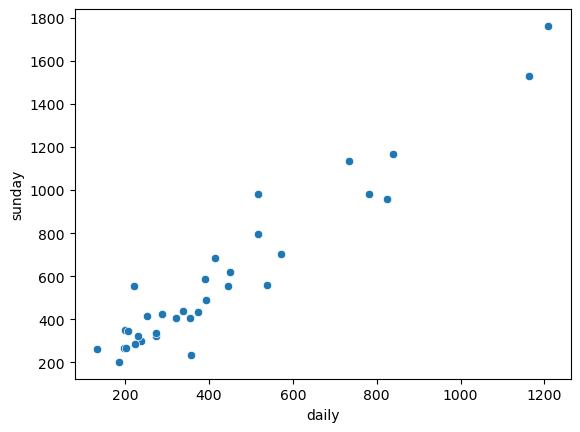

In [20]:
sns.scatterplot(x=df['daily'],y=df['sunday'])

In [21]:
#check daily vs sunday
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

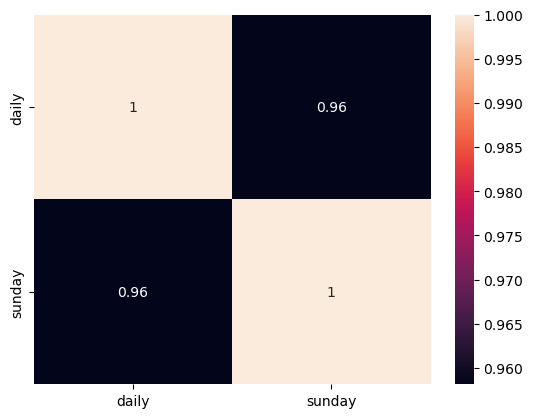

In [22]:
sns.heatmap(df.corr(),annot=True)

# Fitting a Linear Regression Model

In [25]:
#Statasmodels library is used for multiple purpose like statistical calculations, Hypothesis testing,
#linear regression model building etc.
import statsmodels.formula.api as smf 
# model regression model, "y~x", OR "Dependent_variable~Independent_variable"

In [28]:
model = smf.ols("sunday~daily",data = df).fit()
# ordinary least square, y dep. variable - sunday, then give ~ symbol and then x ind. variable - daily,
# dataset - data, fit()- fit the regression line

In [27]:
model

In [29]:
#Coefficient are c or B0 and m or B1
model.params 
# reg equ. : sunday=B0+B1*daily
#             here B1 = 1.33 AND B0 = 13.83

# Sunday=13.83 + 1.33 * daily

#assume daily = 200
# sunday = 13.83 + 1.33 * 200


Intercept    13.835630
daily         1.339715
dtype: float64

In [30]:
sunday = 13.83 + 1.33 * 200   #i.e sunday ko 280 newspaper chahiye
sunday

279.83

In [31]:
#model evaluation (means accuracy of the model) 
#R squared values -0.92 good regression equation
model.rsquared

0.9180596895873295

<Axes: xlabel='daily', ylabel='sunday'>

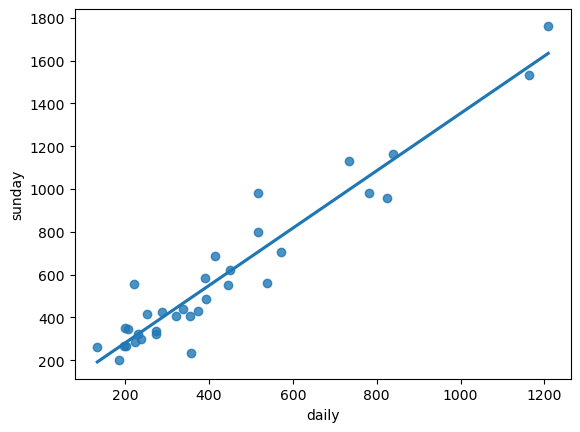

In [33]:
sns.regplot(x = "daily", y = "sunday", data =df, ci=None)

# Predict for new data point

In [35]:
# predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one batch and 300 at another batch
newdata                      #Series = means single column

0    200
1    300
dtype: int64

In [38]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [39]:
model.predict(data_pred) # model - regression model


0    281.778581
1    415.750057
dtype: float64

In [40]:
# Or Create a dataframe using dictionary
data_pred2=pd.DataFrame({'daily':[120,250,720,450,640,900]})
data_pred2

,daily
0,120
1,250
2,720
3,450
4,640
5,900


In [41]:
model.predict(data_pred2)

0     174.601401
1     348.764319
2     978.430255
3     616.707271
4     871.253075
5    1219.578912
dtype: float64

# Transformation

### 1. sqrt
### 2. log

# 1. log transformation

In [43]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [45]:
# to overcome the effect of outlier perform transformations. skewed Histogram will become approximately equal to normal dist.
# log of every column can be taken. it doesn't change the pattern/information in data but changes values to different scale
df["log_daily"] = np.log(df['daily'])
df

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450
5,733.775,1133.249,6.598202
6,198.832,348.744,5.292460
7,252.624,417.779,5.531902
8,206.204,344.522,5.328866
9,231.177,323.084,5.443184


In [48]:
df["log_sunday"]=np.log(df['sunday'])
df

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


In [50]:
#df.hist()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7576\4004372907.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_7576\4004372907.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_7576

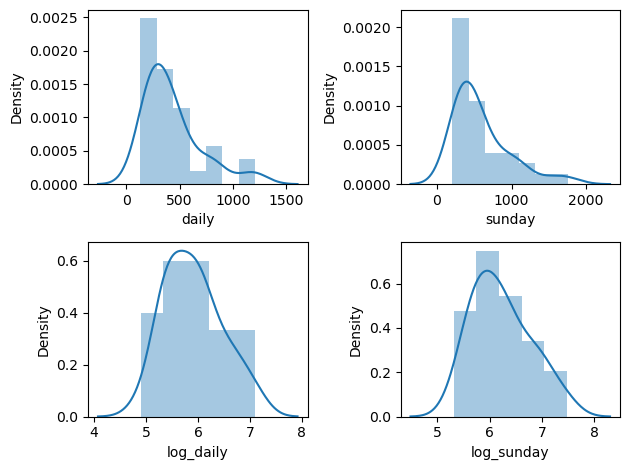

In [54]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])
plt.subplot(2,2,2)
sns.distplot(df['sunday'])
plt.subplot(2,2,3)
sns.distplot(df['log_daily'])
plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])

plt.tight_layout()


In [55]:
df['log_daily'].skew(), df['log_sunday'].skew()

(0.4682202000020356, 0.5337572087816101)

In [56]:
df['daily'].skew(), df['sunday'].skew()

(1.5321591323040094, 1.5644730738925112)

# 2. sqrt transformation

Comparatively less effective than log transformation

In [60]:
df['sqrt_daily']= np.sqrt(df['daily'])
df['sqrt_sunday']= np.sqrt(df['sunday'])
df

,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,15.204506,17.974538


C:\Users\Dell\AppData\Local\Temp\ipykernel_7576\784254648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_7576\784254648.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_7576\7

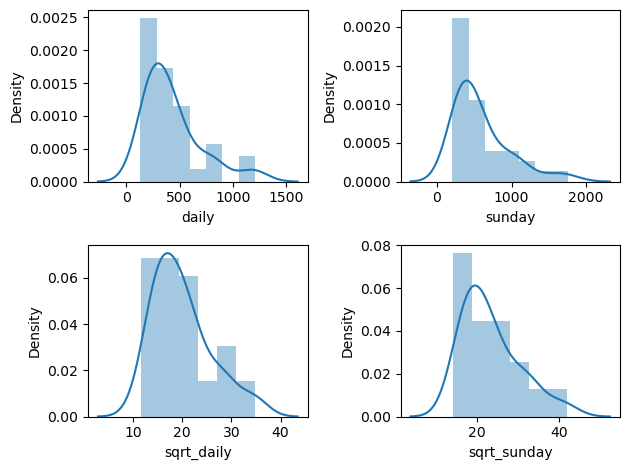

In [61]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])
plt.subplot(2,2,2)
sns.distplot(df['sunday'])
plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])
plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [63]:
df['sqrt_daily'].skew(), df['sqrt_sunday'].sk()

AttributeError: 'Series' object has no attribute 'skwe'